In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cloud_df = pd.read_csv("output_metrics_cloud.csv")
edge_df = pd.read_csv("output_metrics_edge.csv")
hybrid_df = pd.read_csv("output_metrics_hybrid.csv")
sw_df = pd.read_csv("output_metrics_oblique.csv")

In [17]:
cloud_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    300.119044
0.96    300.129642
0.97    300.142566
0.98    300.164620
0.99    300.227121
Name: latency, dtype: float64

In [18]:
edge_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    300.015485
0.96    300.016554
0.97    300.018454
0.98    300.022785
0.99    300.037362
Name: latency, dtype: float64

In [19]:
hybrid_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    300.014335
0.96    300.014931
0.97    300.015680
0.98    300.016998
0.99    300.020427
Name: latency, dtype: float64

In [20]:
sw_df['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    181.805725
0.96    216.196957
0.97    300.012465
0.98    300.075158
0.99    300.106059
Name: latency, dtype: float64

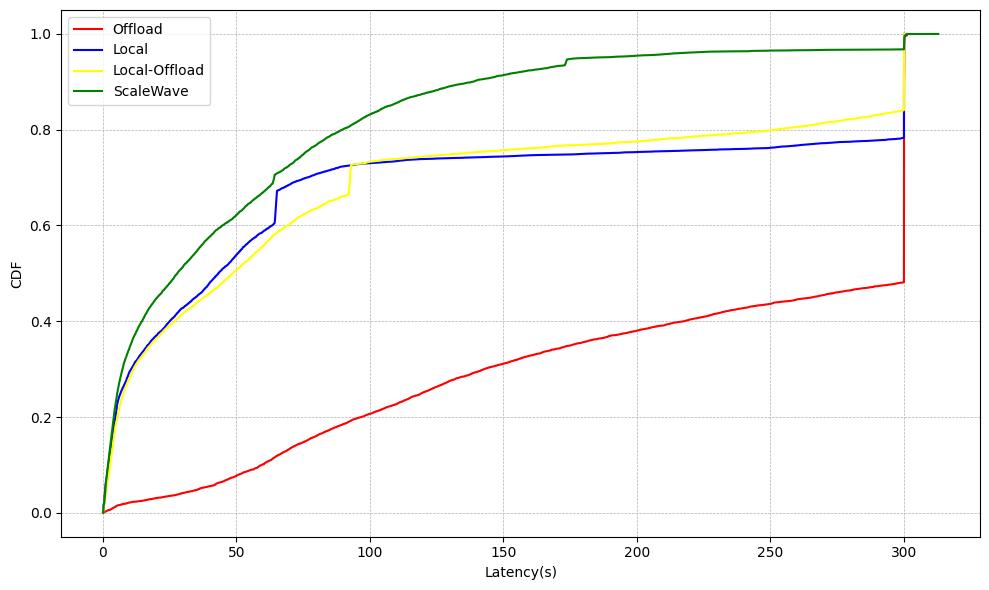

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Define resources to plot
resources = [
    'latency'
]

# Define labels for the deployments
labels = ['Offload', 'Local', 'Local-Offload', 'ScaleWave']

# Define updated colors for the lines, including green for Cloud
# updated_colors = ['#00FF00', '#FF69B4', '#FFA500', '#87CEEB']  # Green, HotPink, Orange, SkyBlue
updated_colors = ['red', 'blue', 'yellow', 'green']

# Function to plot smooth CDF with custom colors and grid
def plot_smooth_cdf(data, labels, resource_name, colors):
    plt.figure(figsize=(10, 6))
    for df, label, color in zip(data, labels, colors):
        # Calculate CDF
        values = np.sort(df[resource_name])
        # values = np.sort(df[df['status_code'] == 200]['latency'])
        cdf = np.arange(1, len(values) + 1) / len(values)
        
        # Make the curve smooth
        try:
            spline = make_interp_spline(values, cdf)
            smooth_values = np.linspace(values.min(), values.max(), 500)
            smooth_cdf = spline(smooth_values)
            plt.plot(smooth_values, smooth_cdf, label=label, color=color)
        except Exception as e:
            # In case of an error with interpolation, plot the original CDF
            plt.plot(values, cdf, label=label, color=color)
    
    # plt.title(f'CDF of {resource_name}')
    plt.xlabel('Latency(s)')
    plt.ylabel('CDF')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    fig_name = "c70_latency_cdf"
    plt.savefig(f'{fig_name}.png')
    plt.show()

# Plot smooth CDF for each resource with updated colors
for resource in resources:
    data = [cloud_df, edge_df, hybrid_df, sw_df]
    plot_smooth_cdf(data, labels, resource, updated_colors)

In [8]:
cloud_df['latency'].describe(percentiles=[.85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean      216.957528
std       101.732128
min         0.028161
50%       300.013167
85%       300.042067
90%       300.071908
91%       300.081716
92%       300.089053
93%       300.099365
94%       300.110224
95%       300.119044
96%       300.129642
97%       300.142566
98%       300.164620
99%       300.227121
max       301.249702
Name: latency, dtype: float64

In [9]:
edge_df['latency'].describe(percentiles=[.85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       96.808574
std       117.358023
min         0.023743
50%        43.254566
85%       300.012395
90%       300.013515
91%       300.013812
92%       300.014183
93%       300.014556
94%       300.014947
95%       300.015485
96%       300.016554
97%       300.018454
98%       300.022785
99%       300.037362
max       300.189966
Name: latency, dtype: float64

In [10]:
hybrid_df['latency'].describe(percentiles=[.8, .85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       95.040820
std       110.356494
min         0.027964
50%        48.591800
80%       252.045828
85%       300.010758
90%       300.012456
91%       300.012785
92%       300.013080
93%       300.013425
94%       300.013876
95%       300.014335
96%       300.014931
97%       300.015680
98%       300.016998
99%       300.020427
max       300.096493
Name: latency, dtype: float64

In [11]:
sw_df['latency'].describe(percentiles=[.8, .85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       53.304658
std        67.278430
min         0.027190
50%        27.813936
80%        89.679779
85%       107.521458
90%       138.414229
91%       146.706270
92%       155.768410
93%       167.265687
94%       173.399266
95%       181.805725
96%       216.196957
97%       300.012465
98%       300.075158
99%       300.106059
max       312.861382
Name: latency, dtype: float64

In [9]:
offload_latencies = cloud_df[cloud_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [10]:
local_latencies=edge_df[edge_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [11]:
local_offload_latencies=hybrid_df[hybrid_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [12]:
scalewave_latencies=sw_df[sw_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [13]:
offload_latencies.to_csv("offload_latencies_c70.csv", index=False)
local_latencies.to_csv("local_latencies_c70.csv", index=False)
local_offload_latencies.to_csv("local_offload_latencies_c70.csv", index=False)
scalewave_latencies.to_csv("scalewave_latencies_c70.csv", index=False)